In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import seaborn as sns

sns.set(style='white', context='notebook', palette='muted')
import matplotlib.pyplot as plt
train=pd.read_csv('/Users/apple/Desktop/dataanalyse/titanic/train.csv')
test=pd.read_csv('/Users/apple/Desktop/dataanalyse/titanic/test.csv')

In [3]:
train.shape
test.shape

(418, 11)

In [4]:
# full is the combination of train and test
full = pd.concat([train, test], ignore_index=True)
full.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [5]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


<Axes: xlabel='Embarked', ylabel='Survived'>

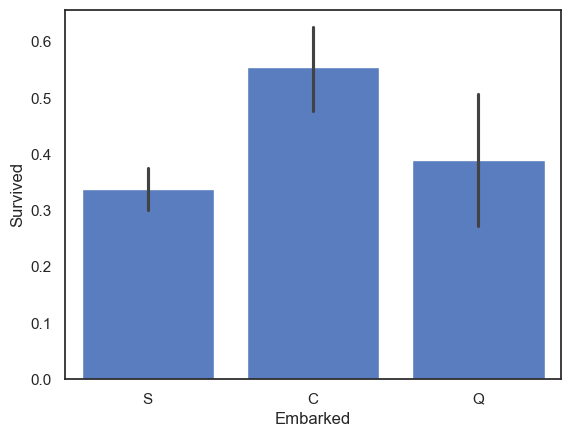

In [6]:
sns.barplot(data=train, x='Embarked', y='Survived')

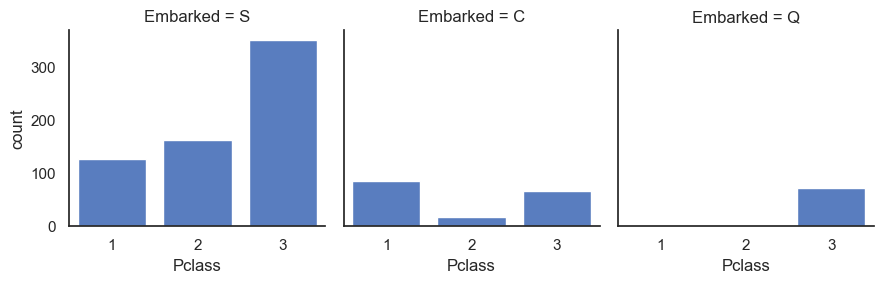

In [7]:
sns.catplot(x='Pclass', col='Embarked', data=train, kind='count', height=3)

<Axes: xlabel='Parch', ylabel='Survived'>

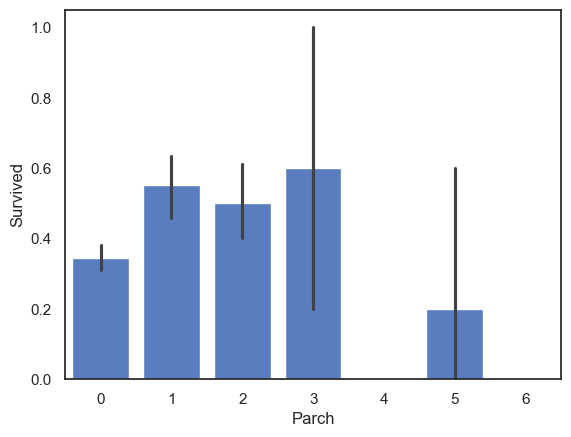

In [8]:
sns.barplot(data=train,x='Parch',y='Survived')

<Axes: xlabel='SibSp', ylabel='Survived'>

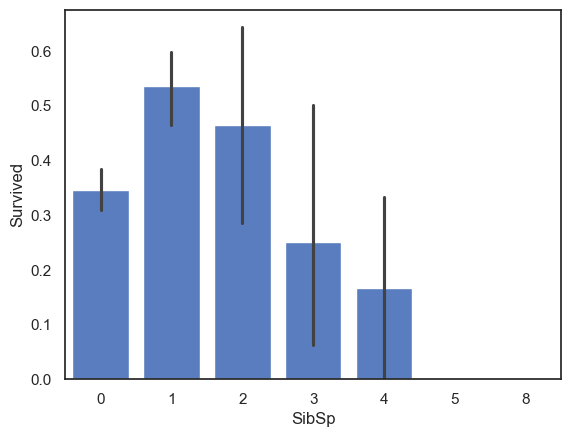

In [9]:
sns.barplot(data=train,x='SibSp',y='Survived')

<Axes: xlabel='Pclass', ylabel='Survived'>

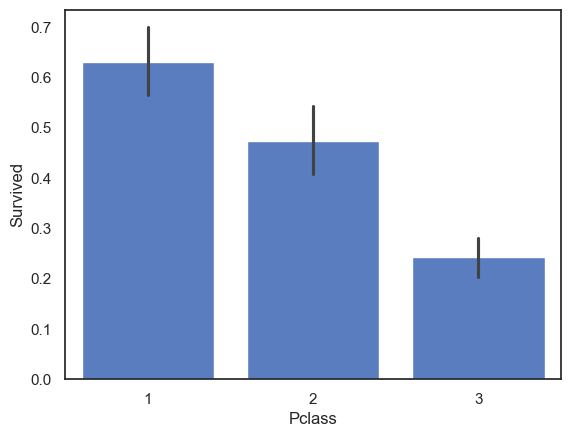

In [10]:
sns.barplot(data=train, x='Pclass', y='Survived')

<Axes: xlabel='Sex', ylabel='Survived'>

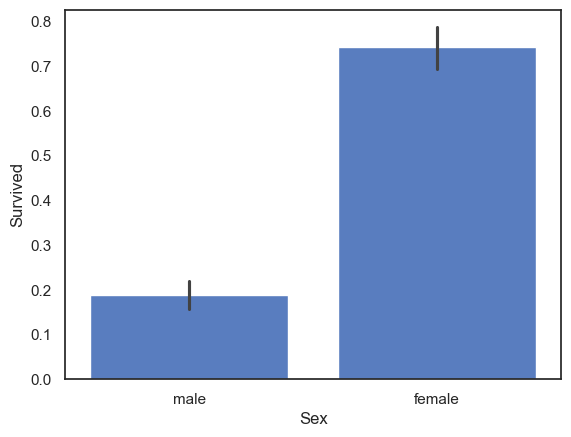

In [11]:
sns.barplot(data=train,x='Sex',y='Survived')

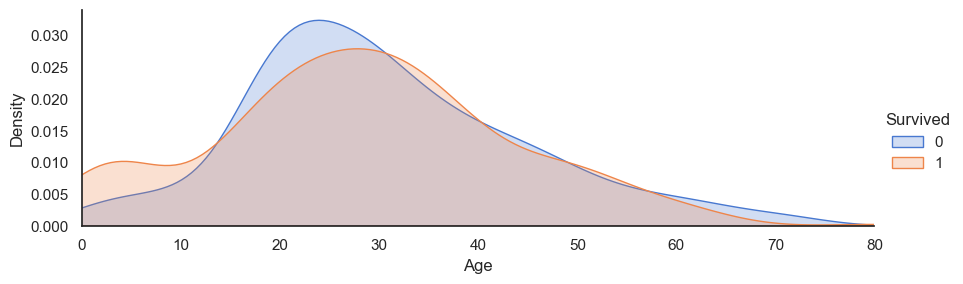

In [12]:
ageFacet = sns.FacetGrid(train, hue='Survived', aspect=3)
ageFacet.map(sns.kdeplot, 'Age', shade=True)
ageFacet.set(xlim=(0, train['Age'].max()))
ageFacet.add_legend()

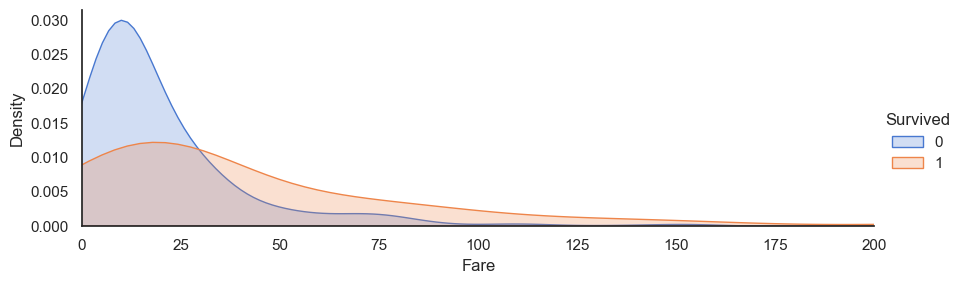

In [13]:
ageFacet = sns.FacetGrid(train, hue='Survived', aspect=3)
ageFacet.map(sns.kdeplot, 'Fare', shade=True)
ageFacet.set(xlim=(0, 200))
ageFacet.add_legend()

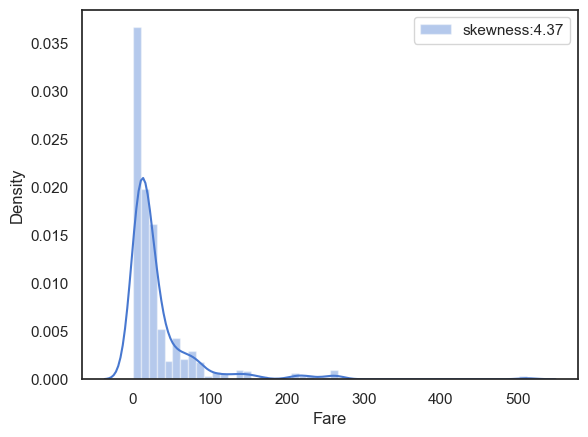

In [14]:
farePlot = sns.distplot(full['Fare'][full['Fare'].notnull()], label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')

In [15]:
full['Fare'] = full['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

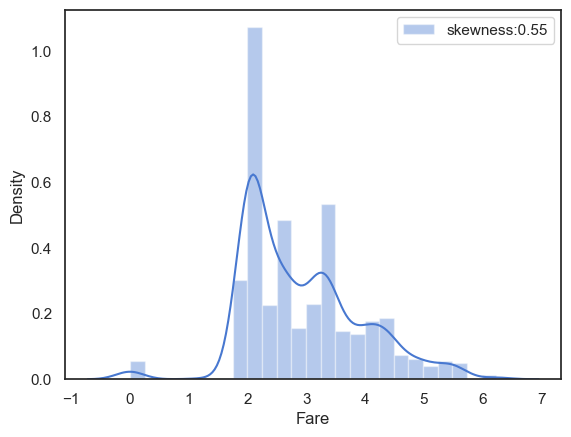

In [16]:
farePlot = sns.distplot(full['Fare'][full['Fare'].notnull()], label='skewness:%.2f'%(full['Fare'].skew()))
farePlot.legend(loc='best')

In [17]:
full['Cabin'] = full['Cabin'].fillna('U')
full['Cabin']

0          U
1        C85
2          U
3       C123
4          U
        ... 
1304       U
1305    C105
1306       U
1307       U
1308       U
Name: Cabin, Length: 1309, dtype: object

In [18]:
full[full['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,4.382027,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,4.382027,B28,NaN


In [19]:
full['Embarked'] = full['Embarked'].fillna('S')

In [20]:
full[full['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [21]:
full['Embarked'].value_counts()

Embarked
S    916
C    270
Q    123
Name: count, dtype: int64

In [22]:
full['Embarked'] = full['Embarked'].fillna('S')

In [23]:
full[full['Fare'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [24]:
full['Title']=full['Name'].map(lambda x:x.split(',')[1].split('.')[0].strip())
full['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [25]:
TitleDict={}
TitleDict['Mr']='Mr'
TitleDict['Mlle']='Miss'
TitleDict['Miss']='Miss'
TitleDict['Master']='Master'
TitleDict['Jonkheer']='Master'
TitleDict['Mme']='Mrs'
TitleDict['Ms']='Mrs'
TitleDict['Mrs']='Mrs'
TitleDict['Don']='Royalty'
TitleDict['Sir']='Royalty'
TitleDict['the Countess']='Royalty'
TitleDict['Dona']='Royalty'
TitleDict['Lady']='Royalty'
TitleDict['Capt']='Officer'
TitleDict['Col']='Officer'
TitleDict['Major']='Officer'
TitleDict['Dr']='Officer'
TitleDict['Rev']='Officer'

full['Title']=full['Title'].map(TitleDict)
full['Title'].value_counts()

Title
Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      5
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='Survived'>

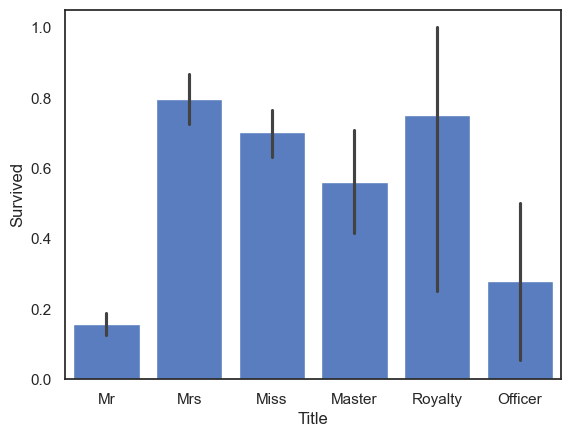

In [26]:
sns.barplot(data=full,x='Title', y='Survived')

<Axes: xlabel='familyNum', ylabel='Survived'>

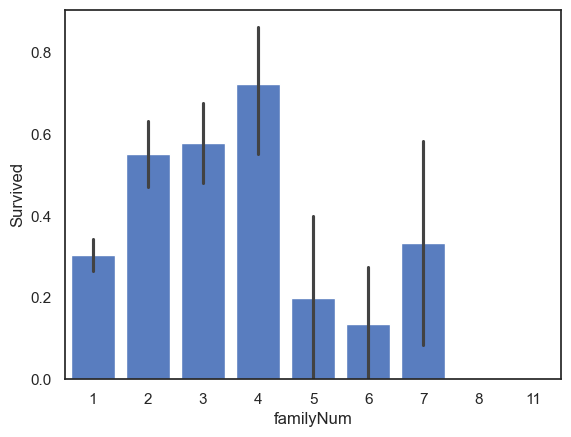

In [27]:
full['familyNum'] = full['Parch'] + full['SibSp'] + 1
sns.barplot(data=full, x='familyNum', y='Survived')

In [28]:
def TickCountGroup(num):
    if(num>=2 and num<=4):
        return 0
    elif (num==1) or ((num >= 5) and (num <= 8)):
        return 1
    else:
        return 2

full['TickGroup'] = full['TickCot'].map(TickCountGroup)
sns.barplot(data=full, x='TickGroup', y='Survived')ß

KeyError: 'TickCot'

In [29]:
full[full['Age'].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,familyNum
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,2.135148,U,Q,Mr,1
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,2.564949,U,S,Mr,1
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,1.977547,U,C,Mrs,1
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,1.977547,U,C,Mr,1
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,2.064226,U,Q,Miss,1


In [30]:
#筛选数据集
AgePre=full[['Age','Parch','Pclass','SibSp','Title','familyNum','TickCot']]
#进行one-hot编码
AgePre=pd.get_dummies(AgePre)
ParAge=pd.get_dummies(AgePre['Parch'],prefix='Parch')
SibAge=pd.get_dummies(AgePre['SibSp'],prefix='SibSp')
PclAge=pd.get_dummies(AgePre['Pclass'],prefix='Pclass')
#查看变量间相关性 
AgeCorrDf=pd.DataFrame()
AgeCorrDf=AgePre.corr()
AgeCorrDf['Age'].sort_values()

KeyError: "['TickCot'] not in index"